In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

# Input data

In [2]:
data_raw = pd.read_csv("ufc-fighters-statistics.csv")
data_raw.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Rex Richards,NaN,7,2,0,195.58,120.20,NaN,NaN,NaN,17.65,58.0,5.29,72.0,0.0,0.0,0.0,17.65
1,Luana Santos,NaN,6,1,0,167.64,56.70,170.18,Orthodox,2000-04-16,17.10,60.0,6.52,68.0,0.0,0.0,100.0,17.10
2,Cortavious Romious,Are You Not Entertained?,7,2,0,162.56,61.23,172.72,Southpaw,1994-01-06,14.48,31.0,20.69,41.0,0.0,0.0,0.0,14.48
3,Danny Silva,El Puma,8,1,0,180.34,65.77,177.80,Switch,1997-01-30,13.60,64.0,13.13,59.0,2.0,66.0,100.0,13.60
4,Angel Pacheco,NaN,7,2,0,172.72,65.77,177.80,Orthodox,1992-01-13,13.13,40.0,13.60,35.0,0.0,0.0,33.0,13.13


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4109 non-null   object 
 1   nickname                                      2255 non-null   object 
 2   wins                                          4109 non-null   int64  
 3   losses                                        4109 non-null   int64  
 4   draws                                         4109 non-null   int64  
 5   height_cm                                     3812 non-null   float64
 6   weight_in_kg                                  4022 non-null   float64
 7   reach_in_cm                                   2183 non-null   float64
 8   stance                                        3287 non-null   object 
 9   date_of_birth                                 2975 non-null   o

# Check NaN value

In [4]:
for col in data_raw.columns:
    print("Total NaN in column", col, "=",data_raw[col].isna().sum())

Total NaN in column name = 0
Total NaN in column nickname = 1854
Total NaN in column wins = 0
Total NaN in column losses = 0
Total NaN in column draws = 0
Total NaN in column height_cm = 297
Total NaN in column weight_in_kg = 87
Total NaN in column reach_in_cm = 1926
Total NaN in column stance = 822
Total NaN in column date_of_birth = 1134
Total NaN in column significant_strikes_landed_per_minute = 0
Total NaN in column significant_striking_accuracy = 0
Total NaN in column significant_strikes_absorbed_per_minute = 0
Total NaN in column significant_strike_defence = 0
Total NaN in column average_takedowns_landed_per_15_minutes = 0
Total NaN in column takedown_accuracy = 0
Total NaN in column takedown_defense = 0
Total NaN in column average_submissions_attempted_per_15_minutes = 0


## Fill NaN value

### "nickname" and "stance"

In [5]:
# We will fill NaN as columns "nickname" by "No" and "stance" by "free"

data_raw["nickname"] = data_raw["nickname"].fillna(value="No")
data_raw["stance"] = data_raw["stance"].fillna(value="Free")

In [6]:
data_raw.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Rex Richards,No,7,2,0,195.58,120.20,NaN,Free,NaN,17.65,58.0,5.29,72.0,0.0,0.0,0.0,17.65
1,Luana Santos,No,6,1,0,167.64,56.70,170.18,Orthodox,2000-04-16,17.10,60.0,6.52,68.0,0.0,0.0,100.0,17.10
2,Cortavious Romious,Are You Not Entertained?,7,2,0,162.56,61.23,172.72,Southpaw,1994-01-06,14.48,31.0,20.69,41.0,0.0,0.0,0.0,14.48
3,Danny Silva,El Puma,8,1,0,180.34,65.77,177.80,Switch,1997-01-30,13.60,64.0,13.13,59.0,2.0,66.0,100.0,13.60
4,Angel Pacheco,No,7,2,0,172.72,65.77,177.80,Orthodox,1992-01-13,13.13,40.0,13.60,35.0,0.0,0.0,33.0,13.13


### "date_of_birth", "height_cm", "weight_in_kg"

In [7]:
# Fill NaN value as "date_of_birth" by mean()

# Convert object type to date_time type
data_raw["date_of_birth"] = pd.to_datetime(data_raw["date_of_birth"], errors='coerce').dt.year # Get value only year

# Fill Nan value
data_raw["date_of_birth"] = data_raw["date_of_birth"].fillna(value=np.mean(data_raw["date_of_birth"])).astype(int)
data_raw["height_cm"] = data_raw["height_cm"].fillna(value=np.mean(data_raw["height_cm"]))
data_raw["weight_in_kg"] = data_raw["weight_in_kg"].fillna(value=np.mean(data_raw["weight_in_kg"]))

data_raw.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Rex Richards,No,7,2,0,195.58,120.20,NaN,Free,1985,17.65,58.0,5.29,72.0,0.0,0.0,0.0,17.65
1,Luana Santos,No,6,1,0,167.64,56.70,170.18,Orthodox,2000,17.10,60.0,6.52,68.0,0.0,0.0,100.0,17.10
2,Cortavious Romious,Are You Not Entertained?,7,2,0,162.56,61.23,172.72,Southpaw,1994,14.48,31.0,20.69,41.0,0.0,0.0,0.0,14.48
3,Danny Silva,El Puma,8,1,0,180.34,65.77,177.80,Switch,1997,13.60,64.0,13.13,59.0,2.0,66.0,100.0,13.60
4,Angel Pacheco,No,7,2,0,172.72,65.77,177.80,Orthodox,1992,13.13,40.0,13.60,35.0,0.0,0.0,33.0,13.13


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4109 non-null   object 
 1   nickname                                      4109 non-null   object 
 2   wins                                          4109 non-null   int64  
 3   losses                                        4109 non-null   int64  
 4   draws                                         4109 non-null   int64  
 5   height_cm                                     4109 non-null   float64
 6   weight_in_kg                                  4109 non-null   float64
 7   reach_in_cm                                   2183 non-null   float64
 8   stance                                        4109 non-null   object 
 9   date_of_birth                                 4109 non-null   i

### "reach_in_cm"

In [9]:
for col in data_raw.columns:
    print("Total NaN in column", col, "=",data_raw[col].isna().sum())

Total NaN in column name = 0
Total NaN in column nickname = 0
Total NaN in column wins = 0
Total NaN in column losses = 0
Total NaN in column draws = 0
Total NaN in column height_cm = 0
Total NaN in column weight_in_kg = 0
Total NaN in column reach_in_cm = 1926
Total NaN in column stance = 0
Total NaN in column date_of_birth = 0
Total NaN in column significant_strikes_landed_per_minute = 0
Total NaN in column significant_striking_accuracy = 0
Total NaN in column significant_strikes_absorbed_per_minute = 0
Total NaN in column significant_strike_defence = 0
Total NaN in column average_takedowns_landed_per_15_minutes = 0
Total NaN in column takedown_accuracy = 0
Total NaN in column takedown_defense = 0
Total NaN in column average_submissions_attempted_per_15_minutes = 0


`I using Linear Regression to fill NaN value of 3 cloumns`

In [10]:
data_raw.corr(method="spearman", numeric_only=True).style.background_gradient()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
wins,1.000000,0.635910,0.265190,-0.014807,-0.057969,0.108903,-0.128404,0.307201,0.264980,0.168993,0.362009,0.299568,0.321506,0.349432,0.307201
losses,0.635910,1.000000,0.285659,0.015581,0.046674,0.060926,-0.376190,0.043894,0.026702,0.080708,0.164273,0.093772,0.142777,0.134675,0.043894
draws,0.265190,0.285659,1.000000,-0.018692,0.020191,-0.024081,-0.184462,-0.029889,0.001333,-0.026176,0.069545,0.000392,0.017419,0.029077,-0.029889
height_cm,-0.014807,0.015581,-0.018692,1.000000,0.769024,0.884861,-0.177082,-0.048218,0.036180,-0.057562,-0.162681,-0.093497,-0.051720,-0.063909,-0.048218
weight_in_kg,-0.057969,0.046674,0.020191,0.769024,1.000000,0.815689,-0.346792,-0.196906,-0.047771,-0.130283,-0.228820,-0.124996,-0.099039,-0.153033,-0.196906
reach_in_cm,0.108903,0.060926,-0.024081,0.884861,0.815689,1.000000,-0.159415,-0.001744,0.122346,-0.054675,-0.153372,-0.053336,0.011478,0.013717,-0.001744
date_of_birth,-0.128404,-0.376190,-0.184462,-0.177082,-0.346792,-0.159415,1.000000,0.345341,0.194439,0.245122,0.026900,0.052825,0.031937,0.142617,0.345341
significant_strikes_landed_per_minute,0.307201,0.043894,-0.029889,-0.048218,-0.196906,-0.001744,0.345341,1.000000,0.652160,0.605938,0.531421,0.326843,0.372510,0.554318,1.000000
significant_striking_accuracy,0.264980,0.026702,0.001333,0.036180,-0.047771,0.122346,0.194439,0.652160,1.000000,0.341877,0.376587,0.417373,0.417807,0.436230,0.652160
significant_strikes_absorbed_per_minute,0.168993,0.080708,-0.026176,-0.057562,-0.130283,-0.054675,0.245122,0.605938,0.341877,1.000000,0.214112,0.114107,0.119132,0.292677,0.605938


In [11]:
# Check Corr
table_1 = data_raw.corr(numeric_only=True)
table = pd.DataFrame(table_1["reach_in_cm"])
table

,reach_in_cm
wins,0.123093
losses,0.070049
draws,-0.035805
height_cm,0.886966
weight_in_kg,0.752006
reach_in_cm,1.000000
date_of_birth,-0.165297
significant_strikes_landed_per_minute,0.006420
significant_striking_accuracy,0.118711
significant_strikes_absorbed_per_minute,-0.049434


In [12]:
col_hight_corr = []
col_hight_corr_value = []
for col in table.index:
    if col == "reach_in_cm" or -0.5 < table["reach_in_cm"][col] < 0.5:
        continue
    else:
        col_hight_corr_value.append(table["reach_in_cm"][col])
        col_hight_corr.append(col)

print(col_hight_corr)
print(col_hight_corr_value)

['height_cm', 'weight_in_kg']
[0.8869661981377286, 0.7520063455986722]


In [13]:
test = data_raw.copy()
test = test.fillna(value=0)
a = np.where(test["reach_in_cm"] == 0)
print(a)
print(len(a[0]))

(array([   0,    6,    9, ..., 4105, 4106, 4107]),)
1926


In [14]:
def Fit_poly1(x, p):
    return p.iloc[0] + p.iloc[1]*x[0] + p.iloc[2]*x[1]

def Fill_NaN_Linear(df, col_x, col_target):
    temp_1 = df.copy()[col_target].fillna(value=0)
    index_ = np.where(temp_1 == 0)[0]
    temp_2 = df.copy().dropna()

    y = temp_2[col_target]
    x1 = temp_2[col_x]
    x = sm.add_constant(x1)
    results = sm.OLS(y, x).fit()
    print(results.summary())
    
    p = results.params
    value_array = []
    for val in index_:
        x0 = np.array(df[col_x[0]][val])
        x1 = np.array(df[col_x[1]][val])
        x_fit = [x0, x1]
        value = Fit_poly1(x_fit, p)
        value_array.append(value)

    # Use loc instead of iloc to set values based on indices
    df.loc[index_, col_target] = value_array

    return df

In [15]:
data = Fill_NaN_Linear(data_raw, col_x=['height_cm', 'weight_in_kg'],col_target=["reach_in_cm"])

                            OLS Regression Results                            
Dep. Variable:            reach_in_cm   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4200.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:53:16   Log-Likelihood:                -6543.1
No. Observations:                2183   AIC:                         1.309e+04
Df Residuals:                    2180   BIC:                         1.311e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3368      2.741      4.135   

In [16]:
data.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Rex Richards,No,7,2,0,195.58,120.20,202.891326,Free,1985,17.65,58.0,5.29,72.0,0.0,0.0,0.0,17.65
1,Luana Santos,No,6,1,0,167.64,56.70,170.180000,Orthodox,2000,17.10,60.0,6.52,68.0,0.0,0.0,100.0,17.10
2,Cortavious Romious,Are You Not Entertained?,7,2,0,162.56,61.23,172.720000,Southpaw,1994,14.48,31.0,20.69,41.0,0.0,0.0,0.0,14.48
3,Danny Silva,El Puma,8,1,0,180.34,65.77,177.800000,Switch,1997,13.60,64.0,13.13,59.0,2.0,66.0,100.0,13.60
4,Angel Pacheco,No,7,2,0,172.72,65.77,177.800000,Orthodox,1992,13.13,40.0,13.60,35.0,0.0,0.0,33.0,13.13


In [17]:
for col in data.columns:
    print("Total NaN in column", col, "=",data[col].isna().sum())

Total NaN in column name = 0
Total NaN in column nickname = 0
Total NaN in column wins = 0
Total NaN in column losses = 0
Total NaN in column draws = 0
Total NaN in column height_cm = 0
Total NaN in column weight_in_kg = 0
Total NaN in column reach_in_cm = 0
Total NaN in column stance = 0
Total NaN in column date_of_birth = 0
Total NaN in column significant_strikes_landed_per_minute = 0
Total NaN in column significant_striking_accuracy = 0
Total NaN in column significant_strikes_absorbed_per_minute = 0
Total NaN in column significant_strike_defence = 0
Total NaN in column average_takedowns_landed_per_15_minutes = 0
Total NaN in column takedown_accuracy = 0
Total NaN in column takedown_defense = 0
Total NaN in column average_submissions_attempted_per_15_minutes = 0


# Check Distributions Col_Number

In [18]:
col_number = []
for col in data.columns:
    if data[col].dtype != "object":
        col_number.append(col)

print(col_number)
print(len(col_number))

['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm', 'date_of_birth', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes']
15


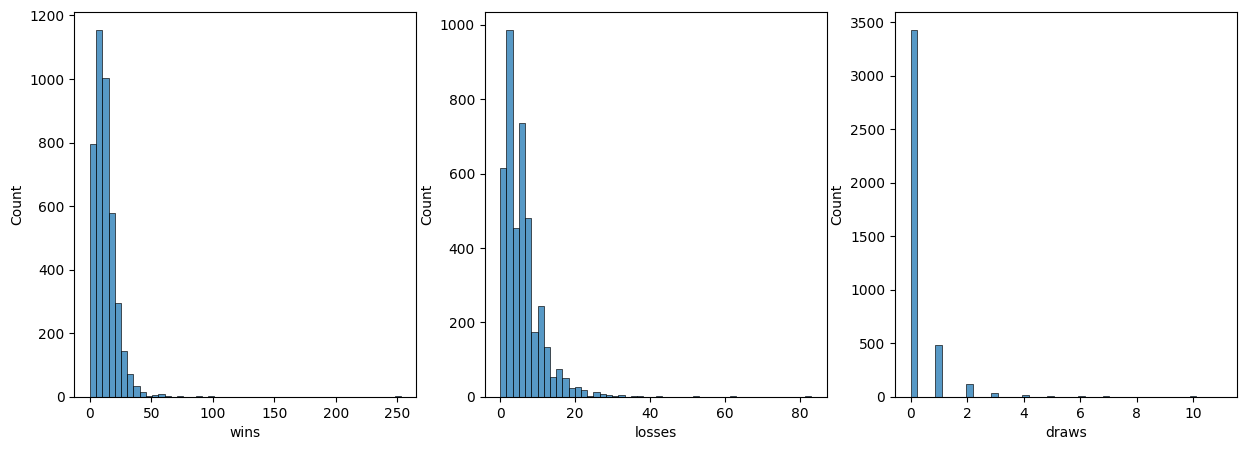

In [19]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(3//3, 3, i+1)
    sns.histplot(data[col_number[i]], bins=50)

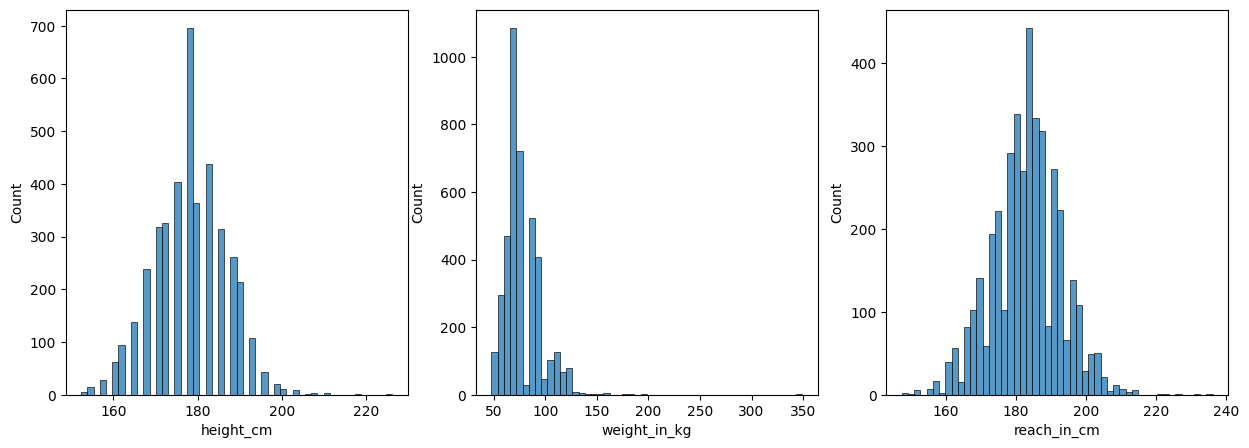

In [20]:
plt.figure(figsize=(15, 5))
for i in range(3, 6):
    plt.subplot(3//3, 3, i+1-3)
    sns.histplot(data[col_number[i]], bins=50)

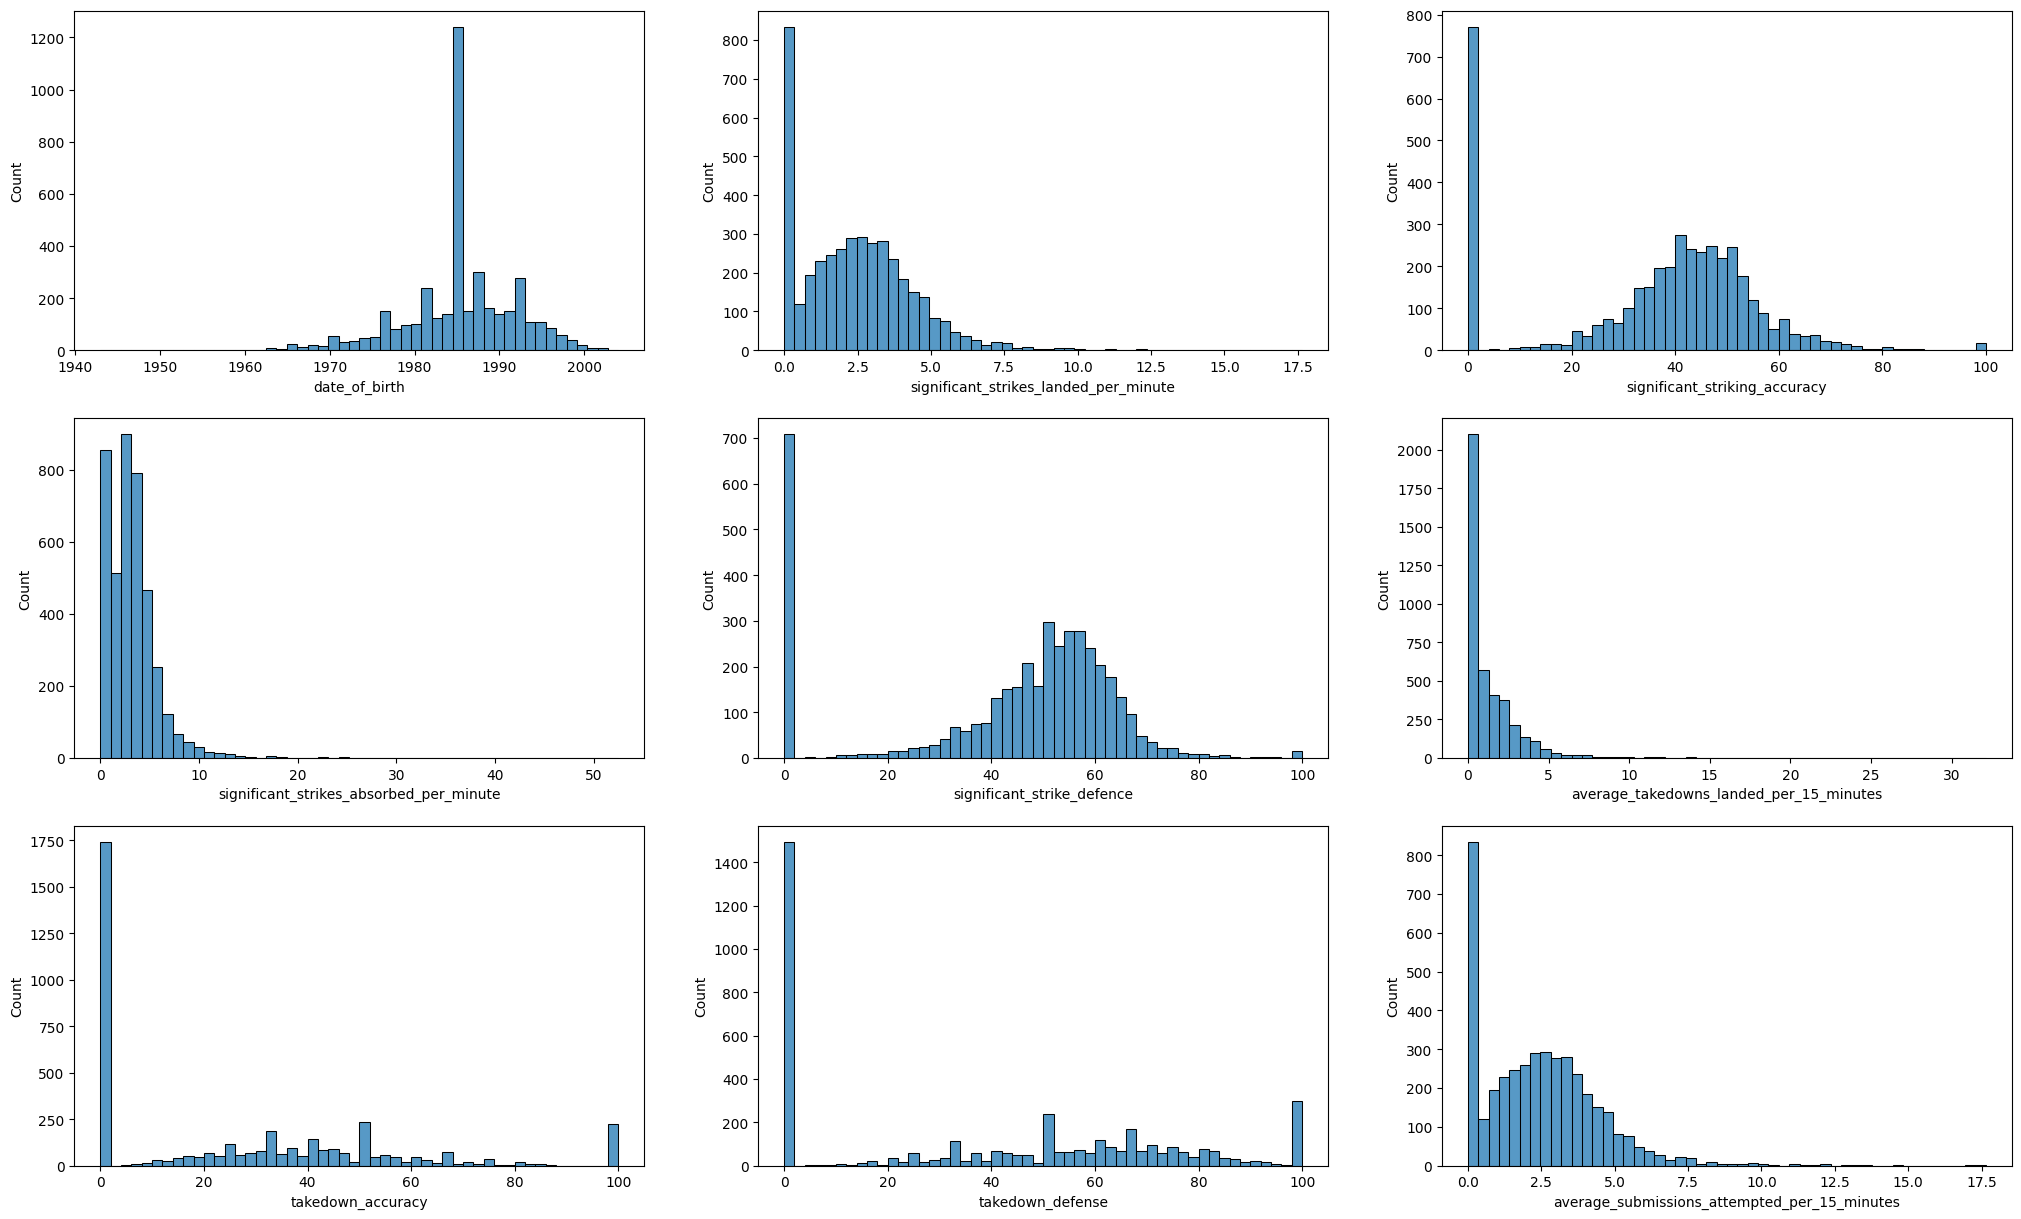

In [21]:
plt.figure(figsize=(25, 15))
for i in range(6, 15):
    plt.subplot((15-6+1)//3, 3, i+1-6)
    sns.histplot(data[col_number[i]], bins=50)

# Analyse Best Fighter

In [22]:
# Check weight of Boxer

data["weight_in_kg"].describe()

count    4109.000000
mean       77.395405
std        17.796889
min        47.630000
25%        65.770000
50%        77.110000
75%        83.910000
max       349.270000
Name: weight_in_kg, dtype: float64


## UFC Weight Divisions & MMA Rankings

$$
\begin{array}{|l|c|c|}
\hline
\textbf{WEIGHT CLASS} & \textbf{MINIMUM WEIGHT} & \textbf{UPPER WEIGHT LIMIT} \\
\hline
Strawweight & None & 115 \, \text{lb} (52.2 \, \text{kg}; 8.2 \, \text{st}) \\
Flyweight & 115 \, \text{lb} (52.2 \, \text{kg}; 8.2 \, \text{st}) & 125 \, \text{lb} (56.7 \, \text{kg}; 8.9 \, \text{st}) \\
Bantamweight & 125 \, \text{lb} (56.7 \, \text{kg}; 8.9 \, \text{st}) & 135 \, \text{lb} (61.2 \, \text{kg}; 9.6 \, \text{st}) \\
Featherweight & 135 \, \text{lb} (61.2 \, \text{kg}; 9.6 \, \text{st}) & 145 \, \text{lb} (65.8 \, \text{kg}; 10.4 \, \text{st}) \\
Lightweight & 145 \, \text{lb} (65.8 \, \text{kg}; 10.4 \, \text{st}) & 155 \, \text{lb} (70.3 \, \text{kg}; 11.1 \, \text{st}) \\
Welterweight & 155 \, \text{lb} (70.3 \, \text{kg}; 11.1 \, \text{st}) & 170 \, \text{lb} (77.1 \, \text{kg}; 12.1 \, \text{st}) \\
Middleweight & 170 \, \text{lb} (77.1 \, \text{kg}; 12.1 \, \text{st}) & 185 \, \text{lb} (83.9 \, \text{kg}; 13.2 \, \text{st}) \\
Light Heavyweight & 185 \, \text{lb} (83.9 \, \text{kg}; 13.2 \, \text{st}) & 205 \, \text{lb} (93.0 \, \text{kg}; 14.6 \, \text{st}) \\
Heavyweight & 205 \, \text{lb} (93.0 \, \text{kg}; 14.6 \, \text{st}) & 265 \, \text{lb} (120.2 \, \text{kg}; 18.9 \, \text{st}) \\
\hline
\end{array}
$$

Calculation of a fighter's score

* Win: 3 points
* Loss: -1 points
* Draw: 1 point

$$
    \text{Total Score} = \text{Number of Wins} \times 3 +  \text{Number of Losses} \times (-1) +  \text{Number of Draws} \times 1
$$

In [23]:
def Data_Fighter_on_RangeWeight(data, min_wei, up_wei):
    data_temp = data.where( (data["weight_in_kg"] >= min_wei) & (data["weight_in_kg"] <= up_wei) ).dropna().reset_index(drop=True)
    
    win_points = 3
    loss_points = -1
    draw_points = 1

    Name = np.unique(data_temp["name"])
    Total_Score = []
    
    for name in Name:
        score = data_temp.where(data_temp["name"] == name).dropna().reset_index(drop=True)
        value = np.sum(score["wins"])*win_points + np.sum(score["losses"])*loss_points + np.sum(score["draws"])*draw_points
        Total_Score.append(value)
    
    result = pd.DataFrame({
        "Name": Name,
        "Total_Score": Total_Score
    })

    result = result.sort_values(by="Total_Score", ascending=False).reset_index(drop=True)

    return result

In [24]:
# Define weight class ranges
weight_classes = {
    "Strawweight": (0, 52.2),
    "Flyweight": (52.2, 56.7),
    "Bantamweight": (56.7, 61.2),
    "Featherweight": (61.2, 65.8),
    "Lightweight": (65.8, 70.3),
    "Welterweight": (70.3, 77.1),
    "Middleweight": (77.1, 83.9),
    "Light Heavyweight": (83.9, 93.0),
    "Heavyweight": (93.0, 120.2),
    "Outweight": (120.2, np.max(data["weight_in_kg"]))
}

# Create a dictionary to store DataFrames for each weight class
data_by_weight_class = {}

# Loop through each weight class and filter the data
for weight_class, (min_weight, max_weight) in weight_classes.items():
    data_by_weight_class[weight_class] = Data_Fighter_on_RangeWeight(data, min_weight, max_weight)

# Access the DataFrames for each weight class as needed
strawweight_data = data_by_weight_class["Strawweight"]
flyweight_data = data_by_weight_class["Flyweight"]
bantamweight_data = data_by_weight_class["Bantamweight"]
featherweight_data = data_by_weight_class["Featherweight"]
lightweight_data = data_by_weight_class["Lightweight"]
welterweight_data = data_by_weight_class["Welterweight"]
middleweight_data = data_by_weight_class["Middleweight"]
light_heavyweight_data = data_by_weight_class["Light Heavyweight"]
heavyweight_data = data_by_weight_class["Heavyweight"]
outweight_data = data_by_weight_class["Outweight"]

In [25]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha = 'center')

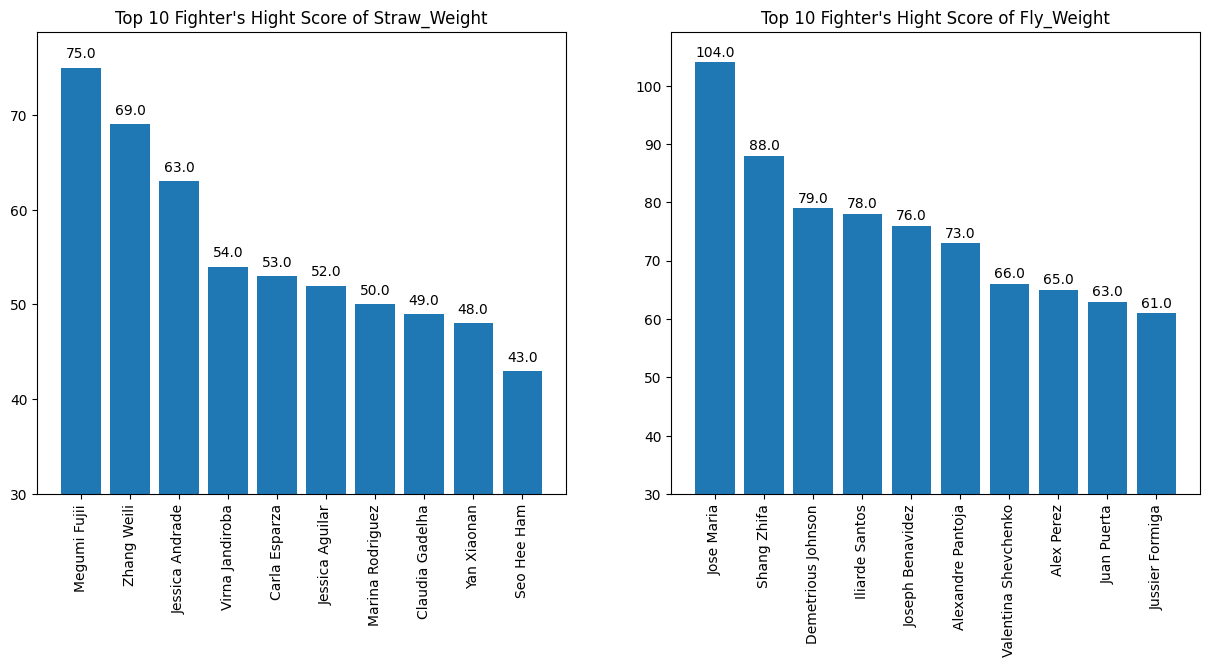

In [26]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.bar(strawweight_data["Name"][:10], strawweight_data["Total_Score"][:10])
addlabels(strawweight_data["Name"][:10], strawweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's Hight Score of Straw_Weight")

plt.subplot(122)
plt.bar(flyweight_data["Name"][:10], flyweight_data["Total_Score"][:10])
addlabels(flyweight_data["Name"][:10], flyweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's Hight Score of Fly_Weight")

plt.show()

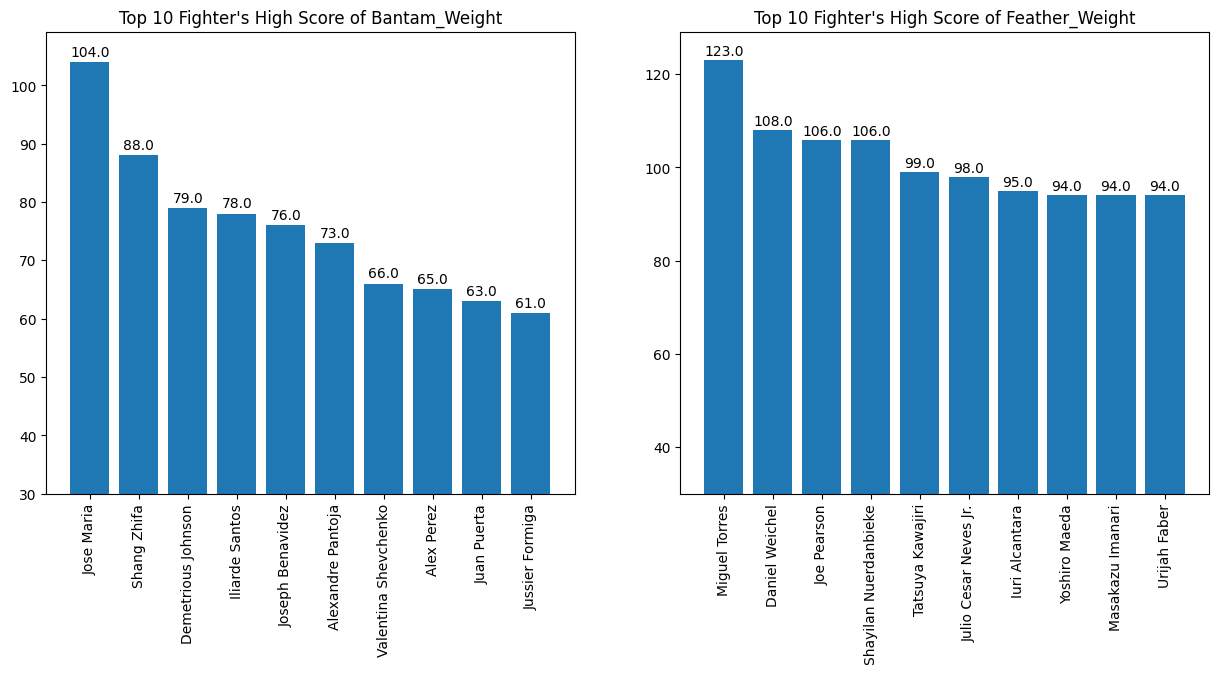

In [27]:
plt.figure(figsize=(15, 6))

# Plotting for Bantamweight
plt.subplot(121)
plt.bar(bantamweight_data["Name"][:10], bantamweight_data["Total_Score"][:10])
addlabels(bantamweight_data["Name"][:10], bantamweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's High Score of Bantam_Weight")

# Plotting for Featherweight
plt.subplot(122)
plt.bar(featherweight_data["Name"][:10], featherweight_data["Total_Score"][:10])
addlabels(featherweight_data["Name"][:10], featherweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's High Score of Feather_Weight")

plt.show()

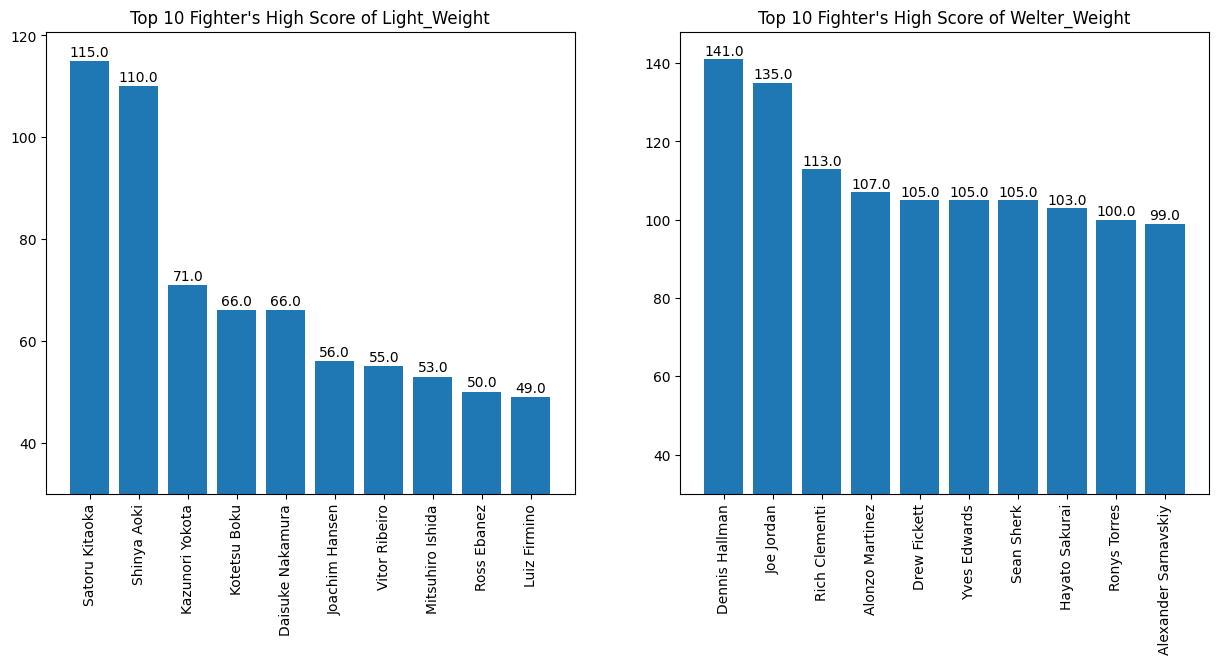

In [28]:
plt.figure(figsize=(15, 6))

# Plotting for Lightweight
plt.subplot(121)
plt.bar(lightweight_data["Name"][:10], lightweight_data["Total_Score"][:10])
addlabels(lightweight_data["Name"][:10], lightweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's High Score of Light_Weight")

# Plotting for Welterweight
plt.subplot(122)
plt.bar(welterweight_data["Name"][:10], welterweight_data["Total_Score"][:10])
addlabels(welterweight_data["Name"][:10], welterweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's High Score of Welter_Weight")

plt.show()

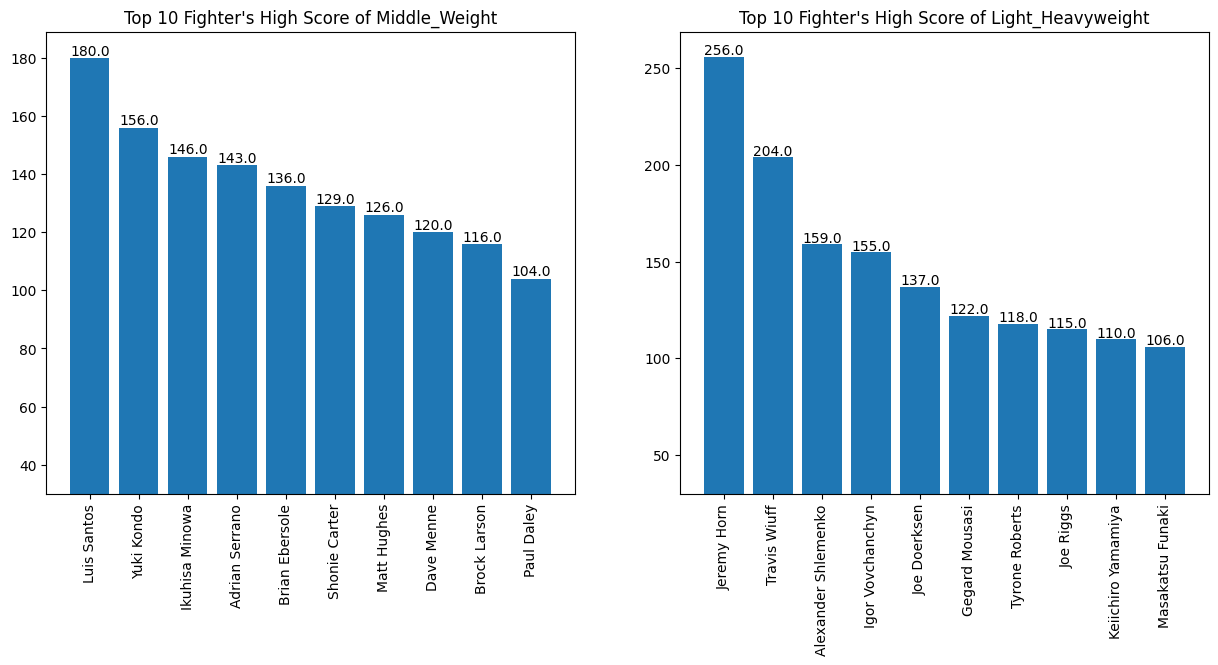

In [29]:
plt.figure(figsize=(15, 6))

# Plotting for Middleweight
plt.subplot(121)
plt.bar(middleweight_data["Name"][:10], middleweight_data["Total_Score"][:10])
addlabels(middleweight_data["Name"][:10], middleweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's High Score of Middle_Weight")

# Plotting for Light Heavyweight
plt.subplot(122)
plt.bar(light_heavyweight_data["Name"][:10], light_heavyweight_data["Total_Score"][:10])
addlabels(light_heavyweight_data["Name"][:10], light_heavyweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's High Score of Light_Heavyweight")

plt.show()

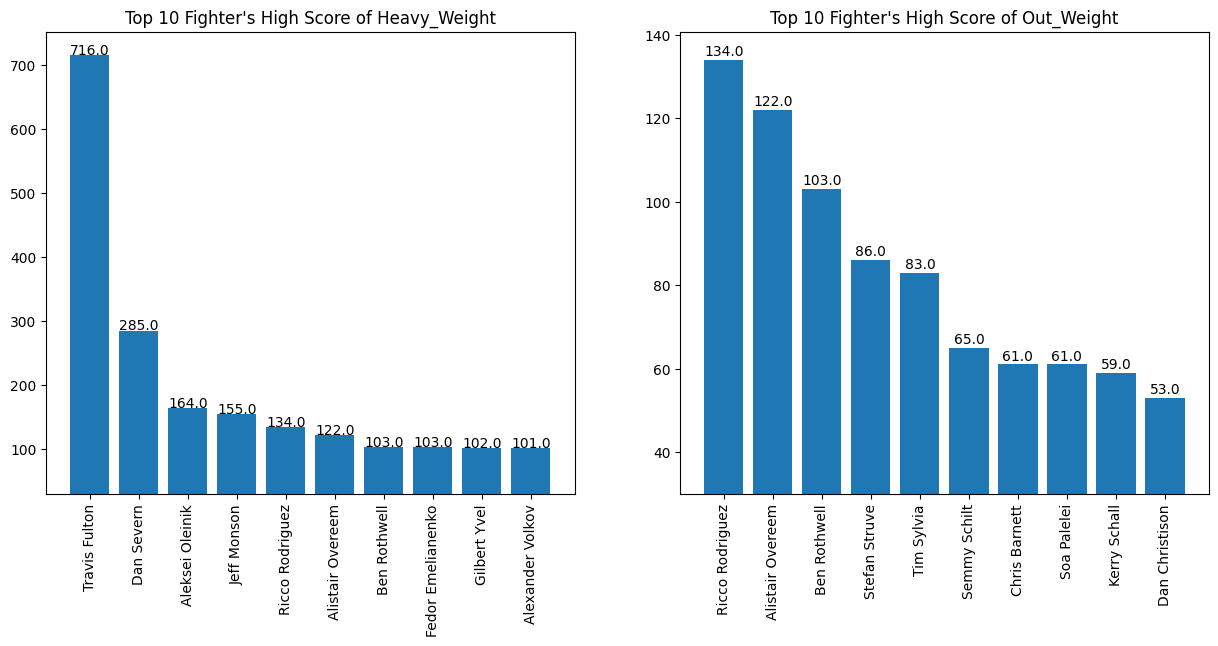

In [30]:
plt.figure(figsize=(15, 6))

# Plotting for Heavyweight
plt.subplot(121)
plt.bar(heavyweight_data["Name"][:10], heavyweight_data["Total_Score"][:10])
addlabels(heavyweight_data["Name"][:10], heavyweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's High Score of Heavy_Weight")

# Plotting for outweight_data
plt.subplot(122)
plt.bar(outweight_data["Name"][:10], outweight_data["Total_Score"][:10])
addlabels(outweight_data["Name"][:10], outweight_data["Total_Score"][:10])
plt.xticks(rotation=90)
plt.ylim(30)
plt.title("Top 10 Fighter's High Score of Out_Weight")

plt.show()

# Build Simple Deep Learning Predictions

In [31]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

2023-11-19 13:53:26.273665: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-19 13:53:26.298453: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 13:53:26.298495: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 13:53:26.298516: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 13:53:26.303486: I tensorflow/core/platform/cpu_feature_g

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4109 non-null   object 
 1   nickname                                      4109 non-null   object 
 2   wins                                          4109 non-null   int64  
 3   losses                                        4109 non-null   int64  
 4   draws                                         4109 non-null   int64  
 5   height_cm                                     4109 non-null   float64
 6   weight_in_kg                                  4109 non-null   float64
 7   reach_in_cm                                   4109 non-null   float64
 8   stance                                        4109 non-null   object 
 9   date_of_birth                                 4109 non-null   i

In [33]:
data.columns

Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')

## Selections Columns To Train

In [34]:
# Get value and using final row to predict

target = data[["wins", "losses", "draws"]][:-1]

x = data[['height_cm',
       'weight_in_kg', 'reach_in_cm', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes']][:-1]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, target, random_state=365, test_size=0.2)

In [36]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3286, 12) (3286, 3)
(822, 12) (822, 3)


## Build model

In [37]:
model = tf.keras.Sequential([
    # Input layer
    tf.keras.Input(shape=(None, 12)),
    # Hide layers
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    # Output layer
    tf.keras.layers.Dense(3) # 3 because target ["wins", "losses", "draws"]
])


model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='mean_squared_error',
                  metrics=['accuracy'])


call_back = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=200,
    restore_best_weights=True,
)


his = model.fit(x_train, y_train, epochs=200, 
        callbacks=[call_back], validation_data=(x_test, y_test), verbose=2)

2023-11-19 13:53:28.770151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-19 13:53:28.774529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-19 13:53:28.774681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/200


2023-11-19 13:53:29.486471: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 13:53:29.762619: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9574f37d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-19 13:53:29.762686: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-11-19 13:53:29.766558: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-19 13:53:29.777153: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-19 13:53:29.837947: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


103/103 - 1s - loss: 143.6528 - accuracy: 0.8156 - val_loss: 53.1763 - val_accuracy: 0.8723 - 1s/epoch - 14ms/step
Epoch 2/200
103/103 - 0s - loss: 44.4482 - accuracy: 0.8582 - val_loss: 40.4551 - val_accuracy: 0.8710 - 166ms/epoch - 2ms/step
Epoch 3/200
103/103 - 0s - loss: 44.4290 - accuracy: 0.8551 - val_loss: 46.4667 - val_accuracy: 0.8710 - 162ms/epoch - 2ms/step
Epoch 4/200
103/103 - 0s - loss: 47.5341 - accuracy: 0.8265 - val_loss: 36.2379 - val_accuracy: 0.8723 - 163ms/epoch - 2ms/step
Epoch 5/200
103/103 - 0s - loss: 43.5753 - accuracy: 0.8436 - val_loss: 36.1325 - val_accuracy: 0.8686 - 165ms/epoch - 2ms/step
Epoch 6/200
103/103 - 0s - loss: 41.6221 - accuracy: 0.8661 - val_loss: 42.9431 - val_accuracy: 0.8710 - 163ms/epoch - 2ms/step
Epoch 7/200
103/103 - 0s - loss: 40.9062 - accuracy: 0.8716 - val_loss: 36.5495 - val_accuracy: 0.8723 - 162ms/epoch - 2ms/step
Epoch 8/200
103/103 - 0s - loss: 42.6958 - accuracy: 0.8344 - val_loss: 40.7325 - val_accuracy: 0.8710 - 163ms/epoch 

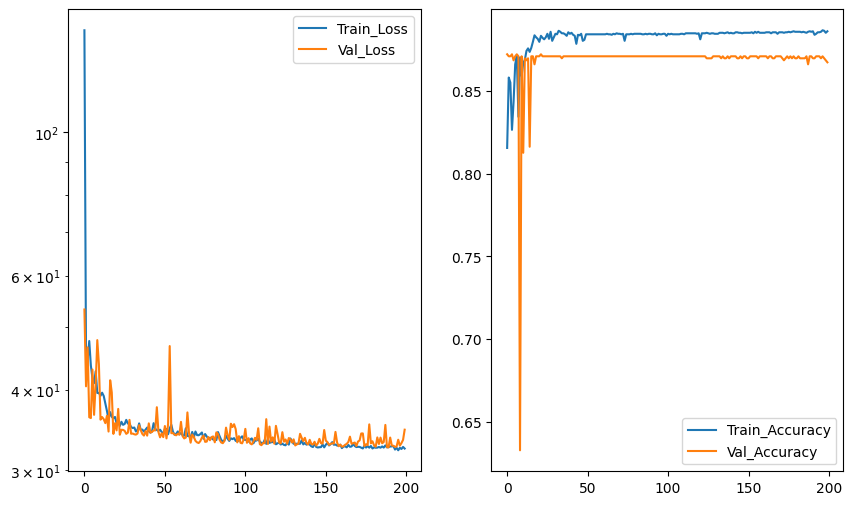

In [38]:
history = pd.DataFrame(his.history)

plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.plot(history["loss"], label="Train_Loss")
plt.plot(history["val_loss"], label="Val_Loss")
plt.yscale('log')
plt.legend()

plt.subplot(122)
plt.plot(history["accuracy"], label="Train_Accuracy")
plt.plot(history["val_accuracy"], label="Val_Accuracy")
plt.legend()

## Predictions

In [39]:
# Extract target values for the last row
target_true = data.loc[len(data)-1, ["wins", "losses", "draws"]]

# Extract predictor variables for the last row
x_predict = data.loc[len(data)-1, ['height_cm',
       'weight_in_kg', 'reach_in_cm', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes']]

In [40]:
target_true

wins      7
losses    3
draws     0
Name: 4108, dtype: object

In [41]:
def Return_Label(x_pre, model):
    x_pre = x_pre.astype(np.float32).to_numpy()
    x_pre = np.expand_dims(x_pre, axis=0) # convert to shape (1, 12)
    label = model.predict(x_pre)
    df = pd.DataFrame({
        "wins": label[0][0],
        "losses": label[0][1],
        'draws':label[0][2]
    }, index=[0])
    return df

In [42]:
target_predict = Return_Label(x_predict, model)

1/1 [==============================] - 0s 65ms/step


In [45]:
print("True Value")
print(target_true)

print("Predict Value")
print(np.round(target_predict).astype(int))

True Value
wins      7
losses    3
draws     0
Name: 4108, dtype: object
Predict Value
   wins  losses  draws
0     6       4      0
